In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
cnn_model_path = r"C:\Users\K M SASTRY\Desktop\PROJECT\cnn_model.h5"
cnn_model = load_model(cnn_model_path)

# Remove the top classification layer to get features
feature_extractor = tf.keras.Model(inputs=cnn_model.input, outputs=cnn_model.layers[-2].output)

In [3]:
# Prepare the data generator for feature extraction with augmentation
data_dir = r"K:\PROJECT\ORGANISED DATASET"
img_height, img_width = 224, 224
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [4]:
# Extract features for training
train_generator = datagen.flow_from_directory(
    directory=f"{data_dir}/train",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 6185 images belonging to 2 classes.


In [5]:
X_train = feature_extractor.predict(train_generator)
y_train = train_generator.classes

194/194 [==============================] - 184s 948ms/step


In [6]:
# Extract features for testing
test_generator = datagen.flow_from_directory(
    directory=f"{data_dir}/test",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 1724 images belonging to 2 classes.


In [7]:
X_test = feature_extractor.predict(test_generator)
y_test = test_generator.classes

54/54 [==============================] - 51s 944ms/step


In [8]:
# Reshape and normalize features
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Split training data into train and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [10]:
# Fit the SVM classifier
svm_clf = SVC(kernel='rbf', C=1, probability=True)  # Use kernel='rbf' for non-linear classification
svm_clf.fit(X_train_split, y_train_split)

SVC(C=1, probability=True)

In [11]:
# Evaluate on validation set
y_val_pred = svm_clf.predict(X_val)
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77       410
           1       0.87      0.93      0.90       827

    accuracy                           0.86      1237
   macro avg       0.85      0.82      0.83      1237
weighted avg       0.85      0.86      0.85      1237



In [12]:
# Evaluate the SVM classifier on the test set
y_pred = svm_clf.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[ 390  152]
 [  81 1101]]


In [13]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.72      0.77       542
           1       0.88      0.93      0.90      1182

    accuracy                           0.86      1724
   macro avg       0.85      0.83      0.84      1724
weighted avg       0.86      0.86      0.86      1724



In [14]:
# Save the trained SVM classifier
import joblib
joblib.dump(svm_clf, r"C:\Users\K M SASTRY\Desktop\PROJECT\cnn_svm_classifier.pkl")

['C:\\Users\\K M SASTRY\\Desktop\\PROJECT\\cnn_svm_classifier.pkl']

1/1 [==============================] - 0s 87ms/step


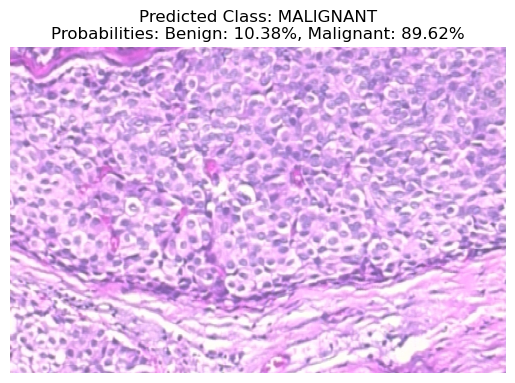

In [22]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
# Preprocess the input image
def preprocess_image(image_path, target_size):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize the image
    return img_array

# Path to the input image (use an image from the test set)
img_path = r"K:\PROJECT\ORGANISED DATASET\test\MALIGNANT\mucinous_carcinoma\SOB_M_MC_14-13413\100X\SOB_M_MC-14-13413-100-036.png"

# Preprocess the image
input_image = preprocess_image(img_path, target_size=(img_height, img_width))

# Extract features using the CNN feature extractor
features = feature_extractor.predict(input_image)
features = features.reshape(1, -1)  # Reshape to fit SVM input

# Make predictions with the SVM
prediction = svm_clf.predict(features)
prediction_proba = svm_clf.predict_proba(features)

# Decode the predicted label
class_indices = train_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}
predicted_label = class_labels[prediction[0]]

# Format probabilities as percentages
prediction_proba_percent = prediction_proba[0] * 100

# Display the input image and prediction results
plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.title(f"Predicted Class: {predicted_label}\n"
          f"Probabilities: Benign: {prediction_proba_percent[0]:.2f}%, "
          f"Malignant: {prediction_proba_percent[1]:.2f}%")
plt.show()

1/1 [==============================] - 0s 64ms/step


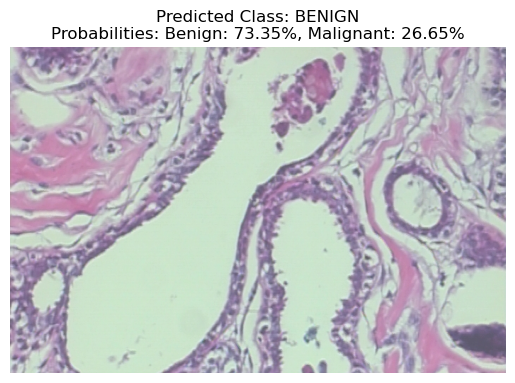

In [28]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
# Preprocess the input image
def preprocess_image(image_path, target_size):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize the image
    return img_array

# Path to the input image (use an image from the test set)
img_path = r"K:\PROJECT\ORGANISED DATASET\test\BENIGN\adenosis\SOB_B_A_14-22549AB\100X\SOB_B_A-14-22549AB-100-004.png"

# Preprocess the image
input_image = preprocess_image(img_path, target_size=(img_height, img_width))

# Extract features using the CNN feature extractor
features = feature_extractor.predict(input_image)
features = features.reshape(1, -1)  # Reshape to fit SVM input

# Make predictions with the SVM
prediction = svm_clf.predict(features)
prediction_proba = svm_clf.predict_proba(features)

# Decode the predicted label
class_indices = train_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}
predicted_label = class_labels[prediction[0]]

# Format probabilities as percentages
prediction_proba_percent = prediction_proba[0] * 100

# Display the input image and prediction results
plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.title(f"Predicted Class: {predicted_label}\n"
          f"Probabilities: Benign: {prediction_proba_percent[0]:.2f}%, "
          f"Malignant: {prediction_proba_percent[1]:.2f}%")
plt.show()